### ***`Linear, Matrix Alzebra & Probability` using Python***

##### **This notebook is created with an objective to implement some daily usage functions from scratch.**
---

#### **Notebook Contents**

1. [DOT product](#Matrices-DOT_product)
    1. [CASE-1.1 : 1-d arrays](#CASE-1.1)
    2. [CASE-1.2 : 2x2 matrices](#CASE-1.2)
    3. [CASE-1.3 : Non-square matrices](#CASE-1.3)
    4. [CASE-1.4 : 3x3 matrices](#CASE-1.4)
2. [Cosine Similarity](#Cosine_similarity)
    1. [Vectors Magnitude](#Vectors_Magnitude)
3. [Matrix Transpose](#Matrix_Transpose)
4. [Generate QQ plot](#Generate_QQ_plot)
    1. [Normally Distributed Data](#Normal_Dist)
    2. [Log-Normal Distributed Data](#Log-Normal_Dist)
5. [Some Matrix Operations](#Some_Matrix_operations)
6. [Generate Histogram; calculate Relative Frequency & Prob Density](#Generate_histogram)
7. [Compare Self-implementation with Matplotlib/Seaborn](#Relative_Frequency,Probability_Density_and_Cumulative_Frequency)
8. [Kernel Density Estimator](#Kernel_Density_Estimator)
    1. [Effect of H in KDE](#Effect_of_H_in_KDE)
9. [PMF - Discrete Variable](#PMF:Discrete_Variable)
10. [PDF - Continuous Variable](#PDF:Continuous_Random_Variable(Gaussian))
---

In [1]:
import os
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from functools import reduce
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

### **Matrices-DOT_product**

#### **CASE-1.1**
##### **1-d arrays**

In [2]:
A = np.array([1,4,7])
B = np.array([3,5,2])

In [3]:
A.shape, B.shape

((3,), (3,))

In [4]:
A.ndim, B.ndim

(1, 1)

In [5]:
def dot_product_1d(vec1, vec2):
    """
    Description: This function is created for generating dot product result of 1-d arrays.
    Inputs: It accepts two inputs:
        1. vec1 : 1-d numpy array
        2. vec2 : 1-d numpy array
        
    Return:
        dot_result : DOT product of two 1-d arrays.
    """
    prd_vals = []
    for idx in enumerate(vec1):
        elements_prd = vec1[idx[0]] * vec2[idx[0]]
        prd_vals.append(elements_prd)
    
    ## Way -1 : Using global sum method
    dot_result = sum(prd_vals)
    
    ## Way -2 : Using numpy sum
    # dot_result = np.sum(prd_vals)
    
    ## Way -3 : Using reduce function with lambda
    # dot_result = reduce(lambda x,y:x+y,prd_vals)
    
    return np.sum(prd_vals)

In [6]:
dot_product_1d(A,B)

37

##### **Match the results**

In [7]:
np.dot(A,B)

37

In [8]:
A @ B

37

##### **Bingo!! All matched above**

#### **CASE-1.2**
##### **2x2 matrices**

In [9]:
A2 = np.array([[1,4],[3,6]])
B2 = np.array([[2,1],[4,5]])

In [10]:
A2.shape, B2.shape

((2, 2), (2, 2))

In [11]:
A2.ndim, B2.ndim

(2, 2)

In [12]:
def matrix_transpose(inp_matrix):
    """
    Description: This function is created for performing the transpose of a matrix.
    Input: It accepts any dimension matrix or array.
        1. inp_matrix : list
    Return: Transposed matrix
        2. transposed_matrix: numpy array
    """
    ## Generating the transposed matrix rows and cols
    trans_cols_num = len(inp_matrix)
    trans_rows_num = len(inp_matrix[0])

    ## Flattening the data row-wise
    flatten_matrix = [element for row in inp_matrix for element in row]
    
    ## Generating the transposed indices then finding the values from flatten matrix 
    matrix = []
    for i in range(trans_rows_num):
        vals = []
        for j in range(i,trans_rows_num * trans_cols_num,trans_rows_num):
            vals.append(flatten_matrix[j])
        matrix.append(vals)
    
    ## Converting from list to numpy array
    transposed_matrix = np.array(matrix)
    return transposed_matrix

def dot_product_2d(m1,m2):
    """
    Description: This function is created for generating dot product result of 2-d matrices.
    Inputs: It accepts two inputs:
        1. m1 : 2-d numpy array
        2. m2 : 2-d numpy array
        
    Return:
        dot_prds : DOT product of two 2-d matrices.
    """
    ## Generating transpose of 2nd matrix
    m2_transpose = matrix_transpose(m2)
    
    ## Generating dot product
    dot_prds = []
    for ix_a in enumerate(m1):
        vals = []
        for ix_b in enumerate(m2_transpose):
            vals.append(dot_product_1d(m1[ix_a[0]], m2_transpose[ix_b[0]]))
        dot_prds.append(vals)    
    return np.array(dot_prds)   

In [13]:
dot_product_2d(A2,B2)

array([[18, 21],
       [30, 33]])

##### **Match the results**

In [14]:
np.dot(A2,B2)

array([[18, 21],
       [30, 33]])

In [15]:
A2 @ B2

array([[18, 21],
       [30, 33]])

##### **Bingo!! All matched above**

#### **CASE-1.3**
##### **Non-square shape matrices**

In [16]:
A3 = np.array([[1,4,5],[3,6,7]])
B3 = np.array([[2,1,3],[4,5,1]])

In [17]:
A3.shape, B3.shape

((2, 3), (2, 3))

In [18]:
A3.ndim, B3.ndim

(2, 2)

In [19]:
dot_product_2d(A3,B3.T)

array([[21, 29],
       [33, 49]])

##### **Match the results**

In [20]:
np.dot(A3,B3.T)

array([[21, 29],
       [33, 49]])

In [21]:
A3 @ B3.T

array([[21, 29],
       [33, 49]])

##### **Bingo!! All matched above**

#### **CASE-1.4**
##### **3x3 matrices**

In [22]:
A4 = np.array([[1,4,5],[3,6,7],[5,6,7]])
B4 = np.array([[2,1,3],[4,5,1],[7,3,2]])

In [23]:
A4.shape, B4.shape

((3, 3), (3, 3))

In [24]:
A4.ndim, B4.ndim

(2, 2)

In [25]:
dot_product_2d(A4,B4)

array([[53, 36, 17],
       [79, 54, 29],
       [83, 56, 35]])

##### **Match the results**

In [26]:
np.dot(A4,B4)

array([[53, 36, 17],
       [79, 54, 29],
       [83, 56, 35]])

In [27]:
A4 @ B4

array([[53, 36, 17],
       [79, 54, 29],
       [83, 56, 35]])

##### **Bingo!! All matched above**

### **Cosine_similarity**
#### **Two 1-d vectors**

In [28]:
A, B

(array([1, 4, 7]), array([3, 5, 2]))

In [29]:
A2, B2

(array([[1, 4],
        [3, 6]]),
 array([[2, 1],
        [4, 5]]))

In [30]:
A3, B3

(array([[1, 4, 5],
        [3, 6, 7]]),
 array([[2, 1, 3],
        [4, 5, 1]]))

##### **Vectors_Magnitude**

In [31]:
def vector_magnitude(vect):
    """
    Description: This function is created for calculating the magnitude of the vector
    Input: It accepts only one parameter:
        1. vect: np.array
            Vector whose magnitude to be calculated
    Return: Calculated length/magnitude of the vector
        vect_mag
    """
    if len(vect.shape) == 1:
        vect = [vect]
    
    ## Flattening the data row-wise
    flatten = lambda x : [element for row in x for element in row]
    flat_vect = flatten(vect)
    
    ## Squared sum of elements
    sqrd_elements_sum = reduce(lambda x,y:x+y,[element**2 for element in flat_vect])
    
    ## Square-root of squared elements sum
    vect_mag = np.sqrt(sqrd_elements_sum)
    return vect_mag

In [32]:
## Vectors magnitude
vector_magnitude(A),vector_magnitude(B), vector_magnitude(A2),vector_magnitude(B2), vector_magnitude(A3),vector_magnitude(B3)

(8.12403840463596,
 6.164414002968976,
 7.874007874011811,
 6.782329983125268,
 11.661903789690601,
 7.483314773547883)

In [33]:
## Numpy generated vector's magnitude
np.linalg.norm(A), np.linalg.norm(B), np.linalg.norm(A2), np.linalg.norm(B2), np.linalg.norm(A3), np.linalg.norm(B3)

(8.12403840463596,
 6.164414002968976,
 7.874007874011811,
 6.782329983125268,
 11.661903789690601,
 7.483314773547883)

##### **Bingo!! All matched above**

In [34]:
def cosine_sim(vect1,vect2):
    """
    Description: This function is created for finding the cosine similarity b/w 2 vectors.
    Input: It accepts 2 parameters:
        1. vect1: np.array
        2. vect2: np.array
    Return: Calculate the cosine similarity
        vects_cosine_similarity
    """
    ## Generating dot product
    dot_prd_vects = dot_product_1d(vect1,vect2)
    
    ## Calculating vectors magnitudes
    vect1_mag = vector_magnitude(vect1)
    vect2_mag = vector_magnitude(vect2)
    
    ## Finding the cosine similarity
    vects_cosine_similarity = dot_prd_vects / (vect1_mag * vect2_mag)
    
    return vects_cosine_similarity

In [35]:
## Self-implementation
cosine_sim(A,B)

0.7388188340435563

In [36]:
## Sklearn result
cosine_similarity([A],[B])

array([[0.73881883]])

##### **Bingo!! results matched**

### **Matrix_Transpose**

##### **1-d array**

In [37]:
A

array([1, 4, 7])

In [38]:
matrix_transpose([A])

array([[1],
       [4],
       [7]])

##### **2x2 matrix**

In [39]:
A2

array([[1, 4],
       [3, 6]])

In [40]:
matrix_transpose(A2)

array([[1, 3],
       [4, 6]])

##### **Non-square matrix**

In [41]:
A3

array([[1, 4, 5],
       [3, 6, 7]])

In [42]:
matrix_transpose(A3)

array([[1, 3],
       [4, 6],
       [5, 7]])

##### **3x3 matrix**

In [43]:
A4

array([[1, 4, 5],
       [3, 6, 7],
       [5, 6, 7]])

In [44]:
matrix_transpose(A4)

array([[1, 3, 5],
       [4, 6, 6],
       [5, 7, 7]])

### **Generate_QQ_plot**

In [45]:
from statsmodels.graphics.gofplots import qqplot

##### **Normal_Dist**

In [46]:
np.random.seed(33)
Aq = np.random.normal(size=200)

In [47]:
Aq_percentiles = []
percentiles_100 = np.arange(start=1,stop=101,step=1)
Aq_100_percentiles = np.percentile(Aq,percentiles_100)
sorted_Aq_100_percentiles = np.sort(Aq_100_percentiles)
sorted_Aq_100_percentiles

array([-2.46599034e+00, -2.20718808e+00, -1.93756264e+00, -1.90145355e+00,
       -1.85187748e+00, -1.70389613e+00, -1.65477286e+00, -1.54063889e+00,
       -1.47095411e+00, -1.41252529e+00, -1.35914329e+00, -1.24005629e+00,
       -1.21815039e+00, -1.17260255e+00, -1.14471007e+00, -1.12181570e+00,
       -1.09882312e+00, -1.08945676e+00, -1.06780572e+00, -1.00372920e+00,
       -9.82088295e-01, -9.52161294e-01, -9.42296878e-01, -9.07972048e-01,
       -8.95722484e-01, -8.23487807e-01, -7.71375816e-01, -7.48173002e-01,
       -6.98078059e-01, -6.74285594e-01, -6.45210123e-01, -6.37765139e-01,
       -6.22855228e-01, -6.09429380e-01, -5.76342200e-01, -5.43078094e-01,
       -4.86952908e-01, -4.61321046e-01, -4.17134964e-01, -3.56951384e-01,
       -3.39976411e-01, -3.03754735e-01, -2.41162835e-01, -2.19266416e-01,
       -1.99036183e-01, -1.69834334e-01, -1.54899113e-01, -1.47856249e-01,
       -1.28421081e-01, -1.00257198e-01, -2.01397309e-02,  7.19443110e-04,
        1.19903444e-02,  

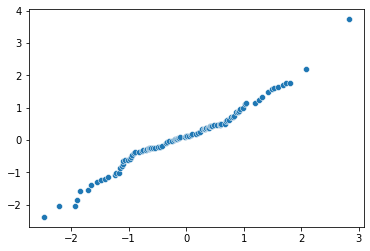

In [48]:
sns.scatterplot(x=sorted_Aq_100_percentiles,y=np.sort(np.random.normal(size=100)));

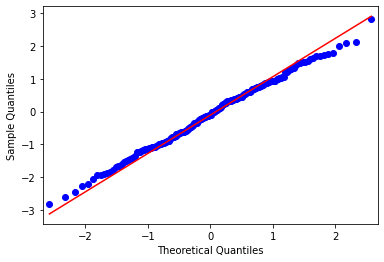

In [49]:
qqplot(Aq,line='q');

##### **Bingo!! Looks quite similar**

##### **Log-Normal_Dist**

In [50]:
Aq_log = np.random.lognormal(size=200)

In [51]:
Aq_log_percentiles = []
Aq_log_100_percentiles = np.percentile(np.log(Aq_log),percentiles_100)
sorted_Aq_log_100_percentiles = np.sort(Aq_log_100_percentiles)
sorted_Aq_log_100_percentiles

array([-2.33820973, -2.15270392, -2.02422615, -1.72585197, -1.62549138,
       -1.59856845, -1.49991339, -1.25393201, -1.22995031, -1.20401731,
       -1.19024699, -1.15117659, -1.06548097, -1.05532187, -1.04395245,
       -0.97042171, -0.86805412, -0.84764827, -0.82974912, -0.82575889,
       -0.79834578, -0.75447177, -0.67881047, -0.67475326, -0.62189926,
       -0.60935312, -0.58807236, -0.56751884, -0.53181589, -0.50453319,
       -0.42546144, -0.40505289, -0.39422791, -0.3769809 , -0.35080662,
       -0.3425501 , -0.30923394, -0.24694726, -0.23044649, -0.22405655,
       -0.21567083, -0.18650033, -0.13029206, -0.12363573, -0.0942395 ,
       -0.0662814 , -0.03149388, -0.02263501, -0.00454816,  0.01169328,
        0.05943071,  0.07636514,  0.08926398,  0.09381723,  0.09865338,
        0.11533098,  0.1361097 ,  0.15232059,  0.16282453,  0.2158422 ,
        0.21984901,  0.24099094,  0.25983132,  0.27837256,  0.31617368,
        0.32973924,  0.34098613,  0.34951088,  0.38557789,  0.40

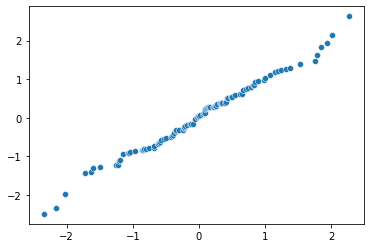

In [52]:
sns.scatterplot(x=sorted_Aq_log_100_percentiles,y=np.sort(np.random.normal(size=100)));

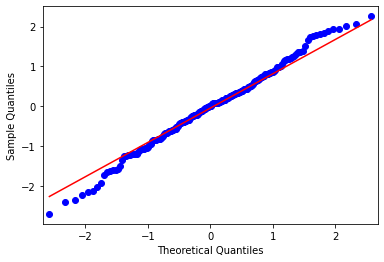

In [53]:
qqplot(np.log(Aq_log),line='q');

##### **Bingo!! Looks quite similar**

### **Some_Matrix_operations**
- Cross-product
- Minors of matrix
    - Minors of Diagonals
- Co-factors
- Adjugate
    - Given a square matrix A, the transpose of the matrix of the cofactor of A is called adjoint of A and is denoted by adj A. An adjoint matrix is also called an adjugate matrix. In other words, we can say that matrix A is another matrix formed by replacing each element of the current matrix by its corresponding cofactor and then taking the transpose of the new matrix formed.
- Determinant
- Inverse
- Trace --> (Sum of Diagonal elements)

In [54]:
from IPython.display import Image

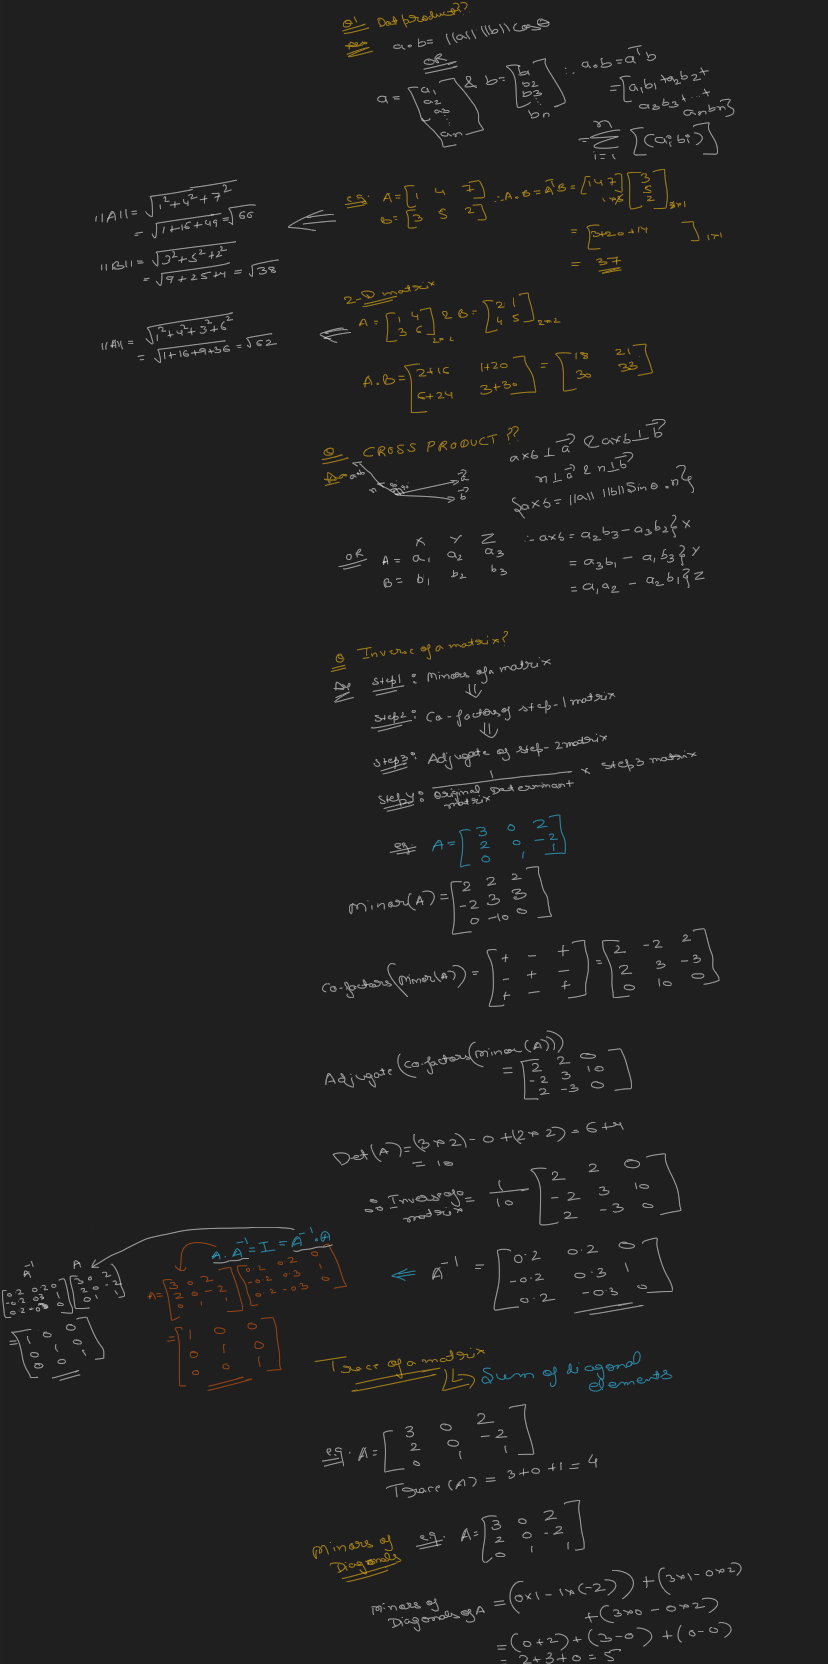

In [55]:
## Some Important Matrix operations
Image("Some_Matrix_Operations.png",width=1000,height=1000)

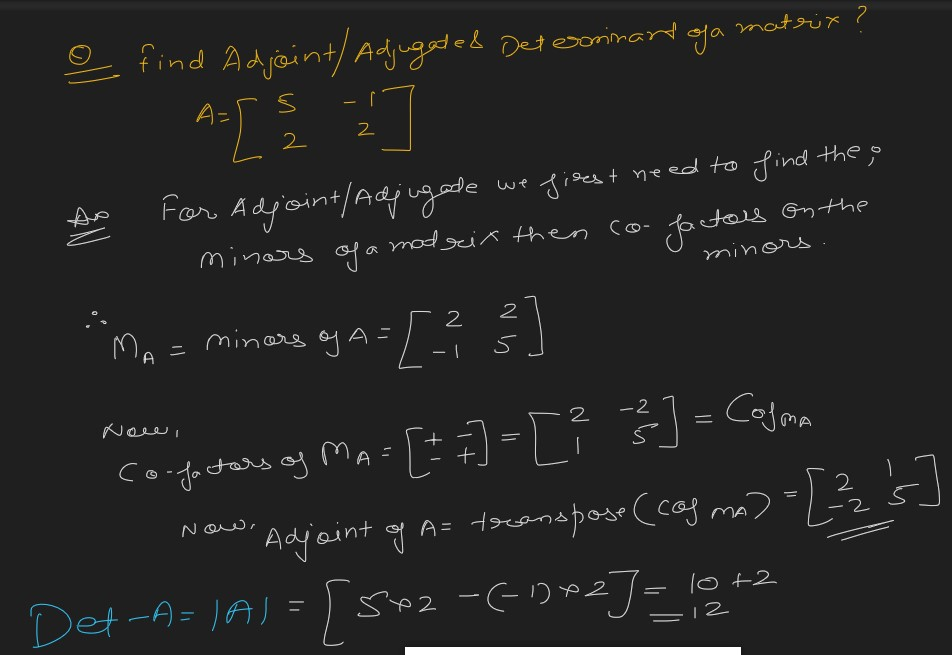

In [56]:
## Solve MAtrix Adjugate/Adjoint question
Image("Matrix_Adjugate_Det.jpg",width=1000,height=1000)

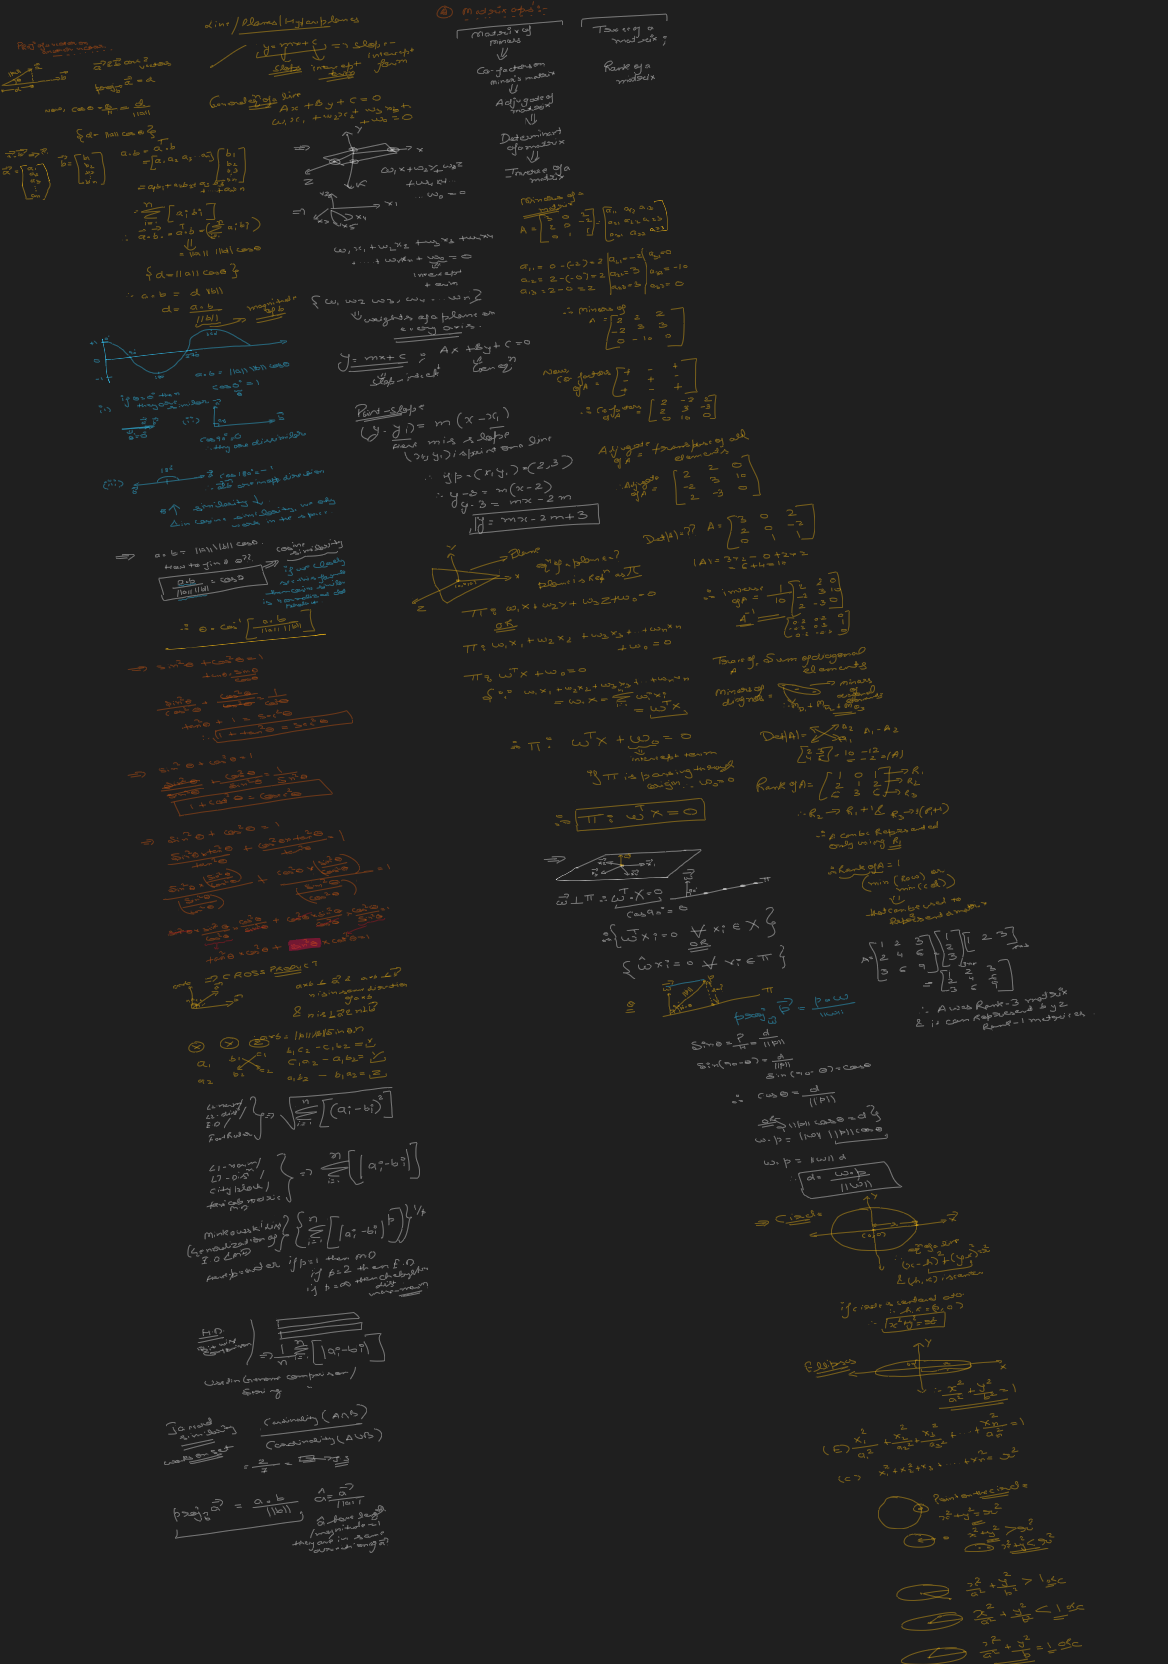

In [57]:
## Self revision notes
Image("Linear_Matrix_Alzebra.png",width=2000,height=2000)

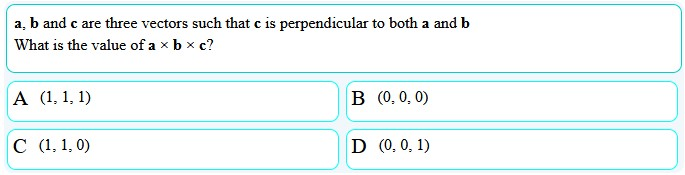

In [58]:
## Solve this question on Cross product
Image("Matrix_Alzebra_Q1.jpg")

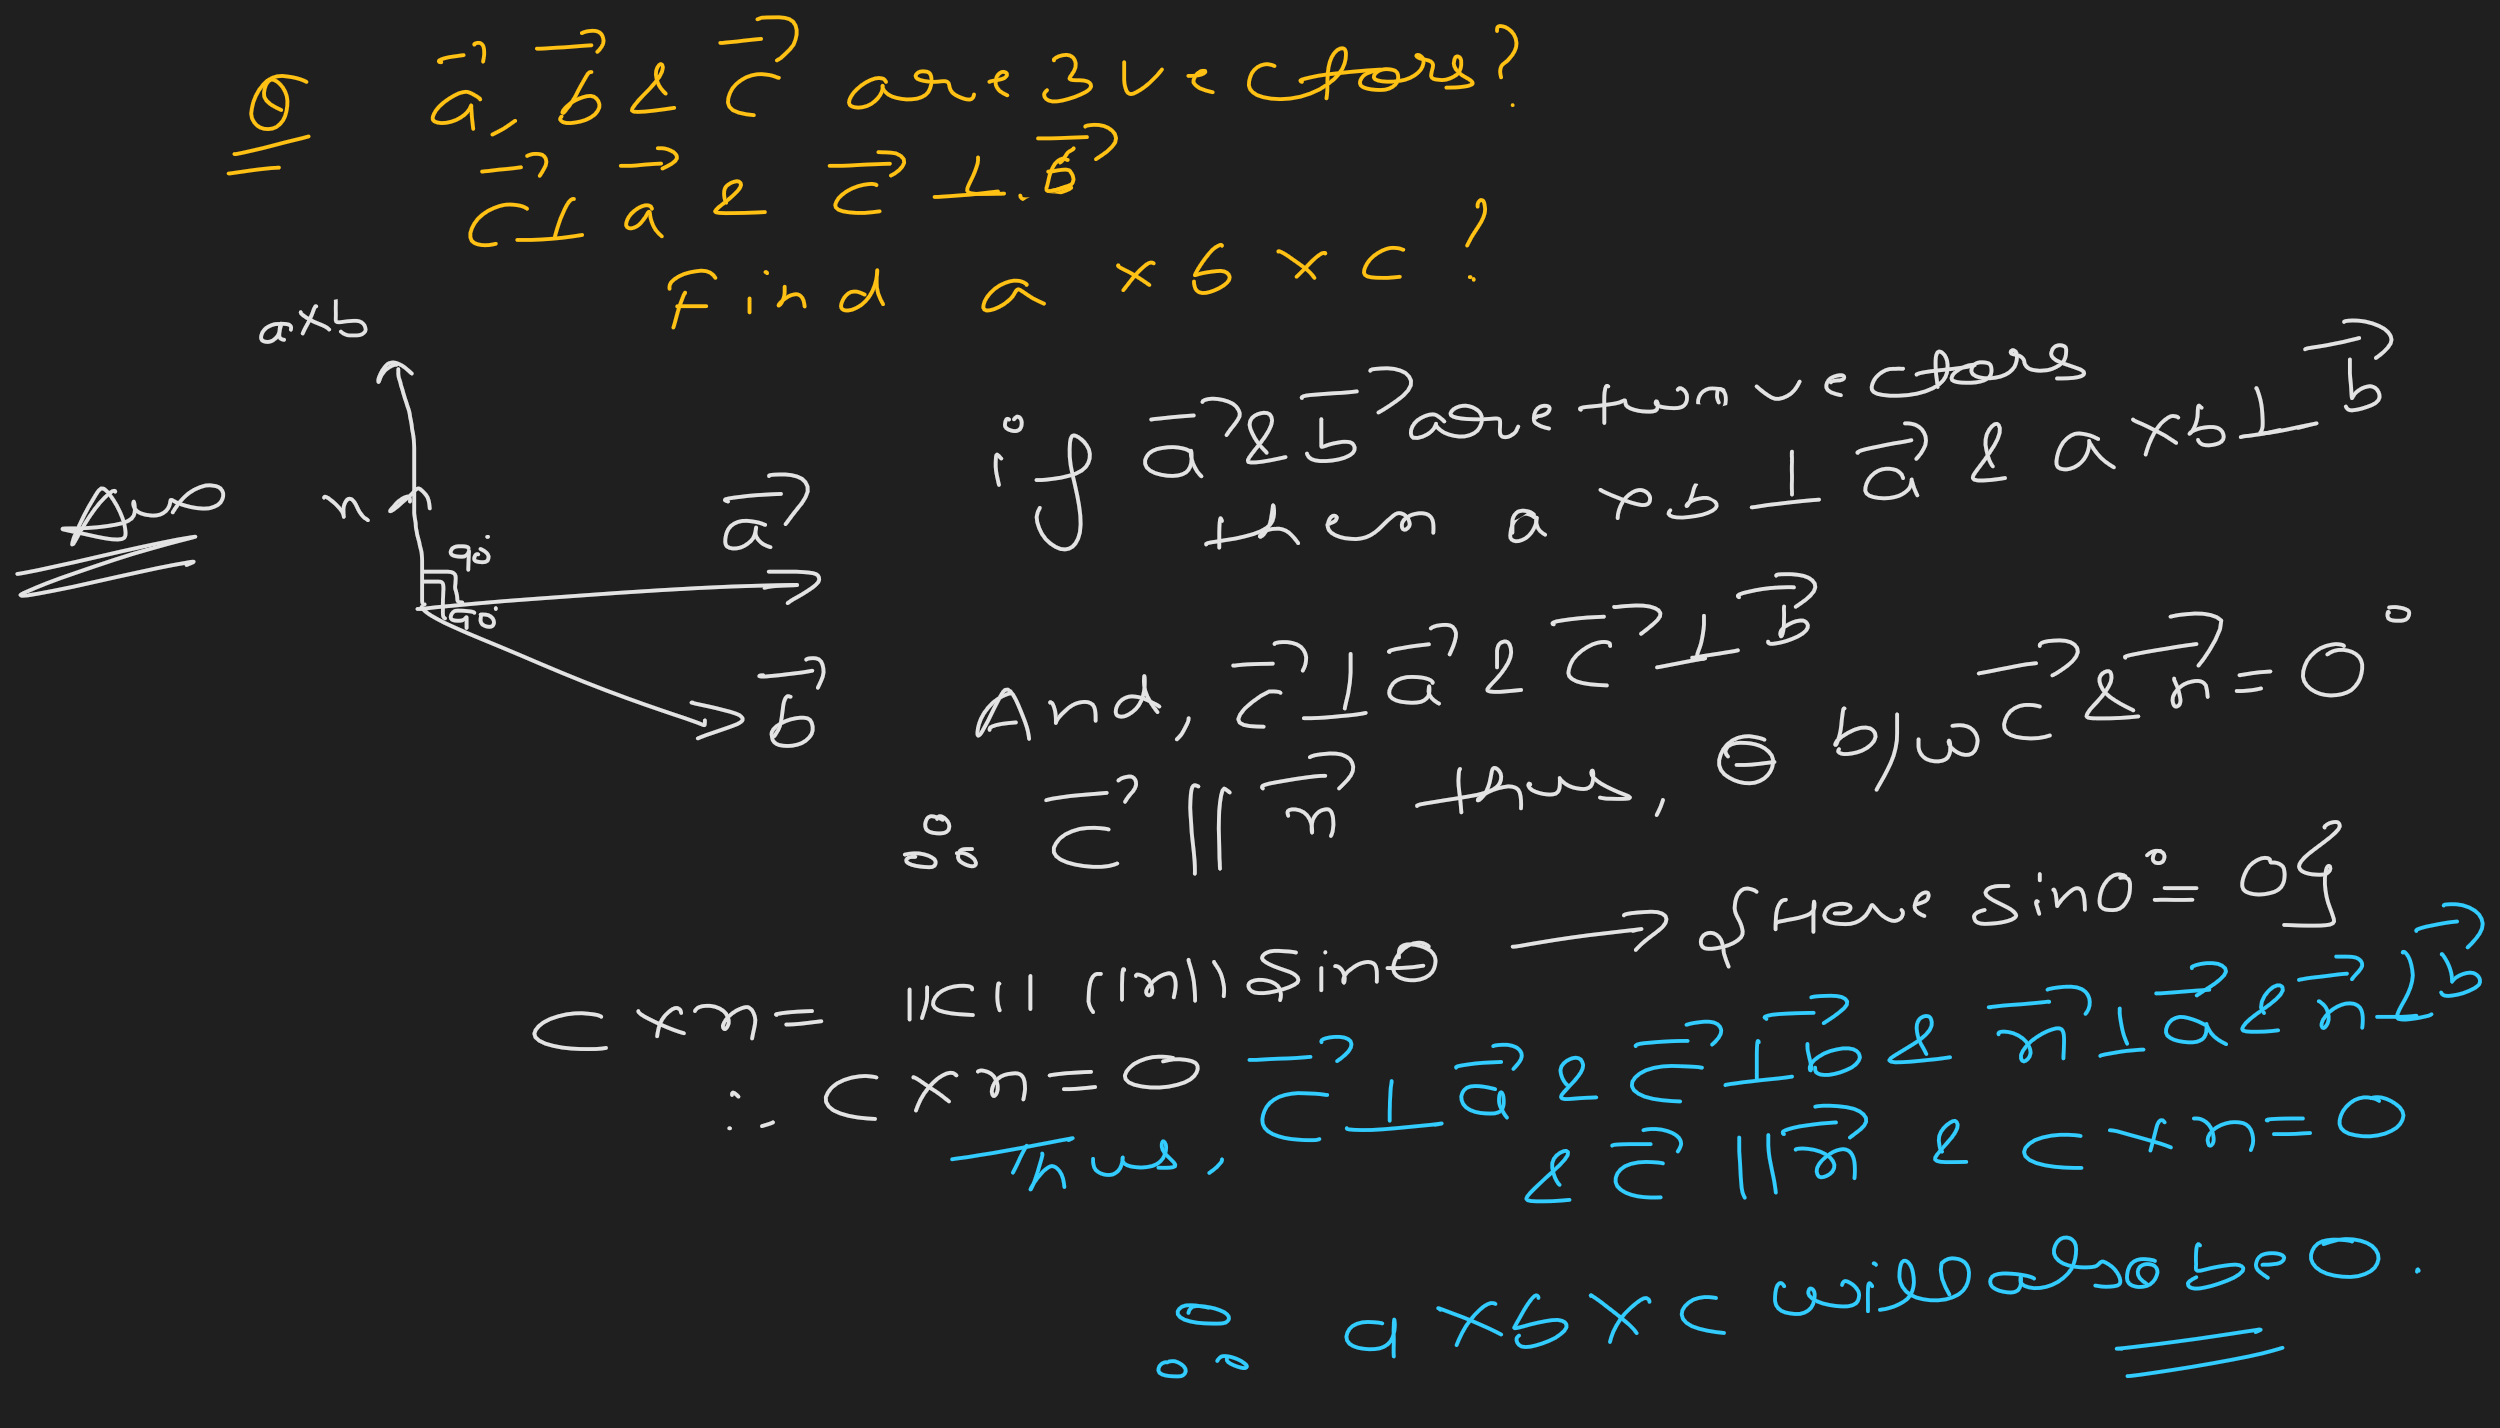

In [59]:
## Solution
Image("Cross_prd_qs.png")

### **Generate_histogram**
#### **How to plot the histogram of a data?**

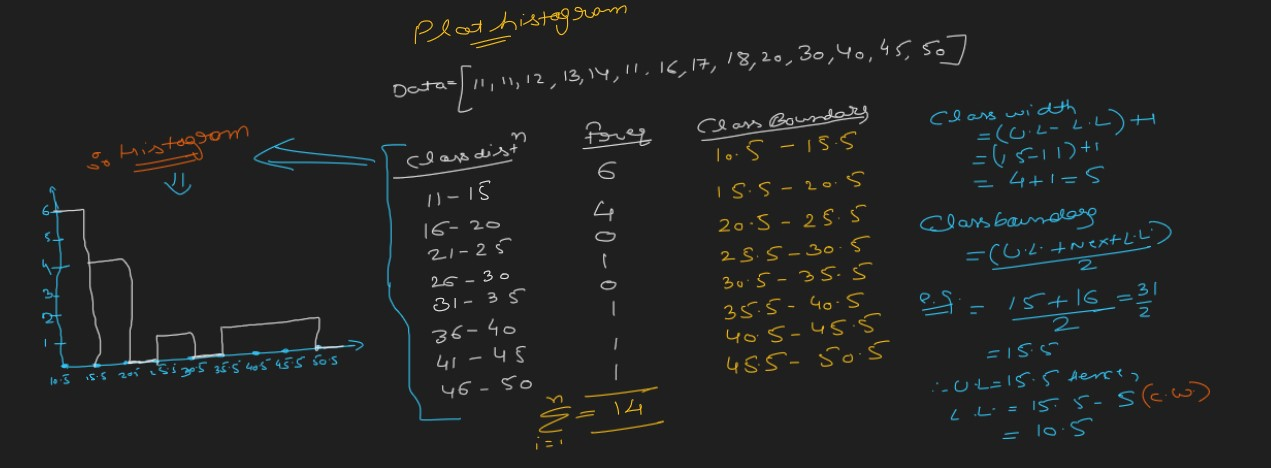

In [60]:
Image("Plot_Histogram.jpg",width=1200,height=1200)

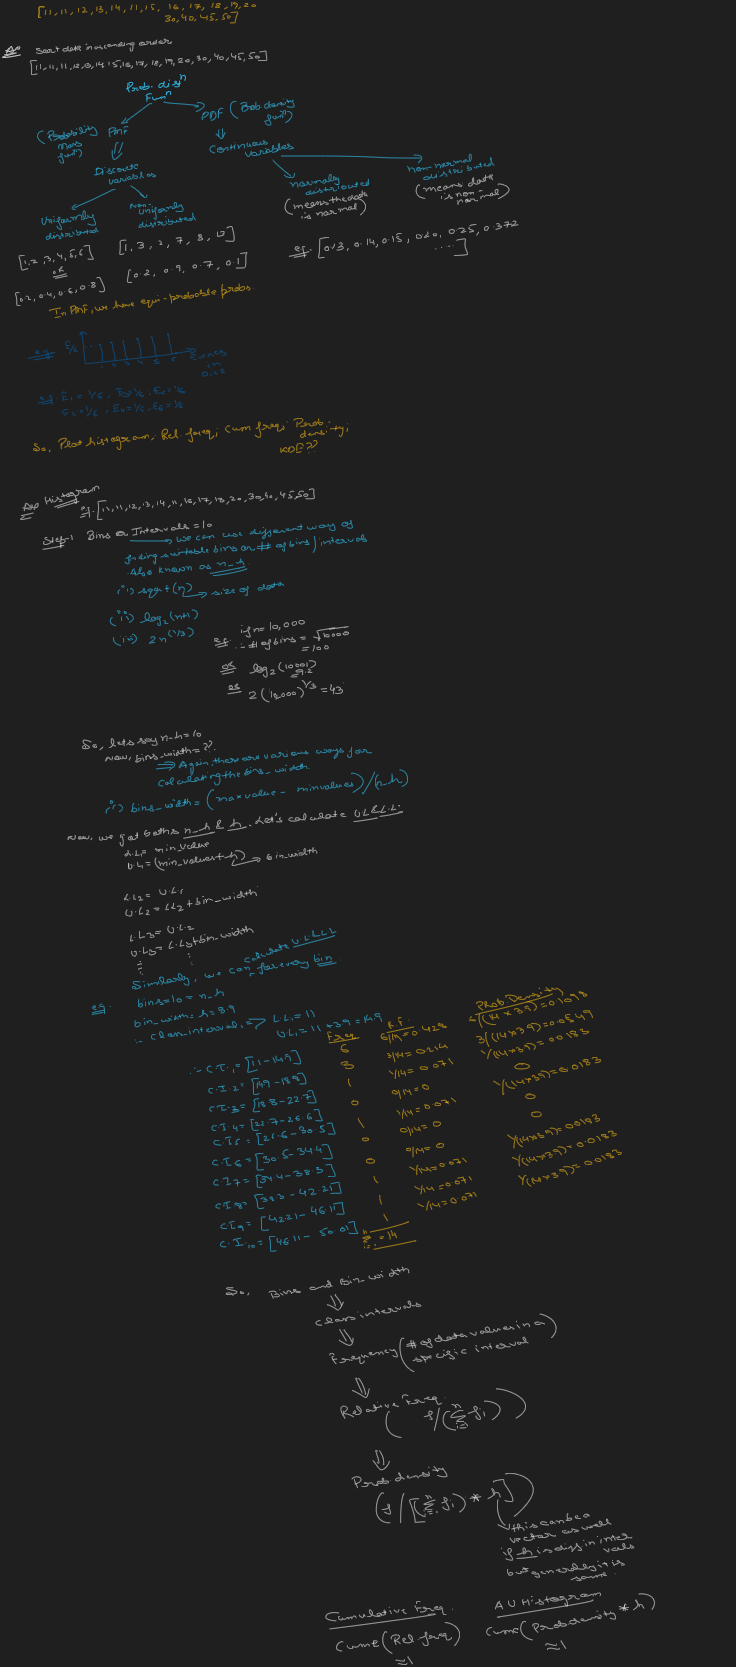

In [102]:
Image("Histogram_RelFreq_ProbDen_Cum_Freq.png",width=1000,height=1000)

In [61]:
def plot_hist(data,number_of_bins=10):
    """
    Description : This function is created for plotting the histogram of data.
    
    Input: It accepts below parameters:
        1. data : For which histogram to be plotted
        2. number_of_bins : number of intervals or bins to be formed. By default = 10
    
    Return: Plot the graph and returns the dataframe with values
    """
    bins = number_of_bins
    
    # Sort the data in ascending order
    hist_data_srt = np.sort(data)
    
    # Calculating bin width
    bin_width = (max(hist_data_srt)+0.01 - min(hist_data_srt))/bins
    bin_width = np.round(bin_width,3)
    
    # Generate the class_limits list
    class_limits = []
    class_limits.append(hist_data_srt.min())
    for i in range(1,(bins*2),1):
        if i%2 != 0:
            class_limits.append(class_limits[-1]+bin_width)
        else:
            class_limits.append(class_limits[-1])
    
    # Calculate the upper_limit of class_boundary
    ul = (class_limits[1] + class_limits[2])/2
    
    # Calulate the difference between class_boundary and class_distn raw data value
    diff = ul - class_limits[1]
    
    # Substracting the diff from raw class values
    cb = [raw_val[1]-diff if raw_val[0]%2 == 0 else raw_val[1]+diff for raw_val in enumerate(class_limits)]
    
    # Bucketing the class_distribution and class_boundaries rows
    intrvals = [i for i in range(len(cb)) if i%2 == 0]    
    class_distn_cb = []
    for idx in intrvals:
        class_distn_cb.append([cb[idx],cb[idx+1]])
     
    class_distn = []
    for idx in intrvals:
        class_distn.append([class_limits[idx],class_limits[idx+1]])
    
    # Calculating the Frequency of data in the range
    freq = []
    for i in range(len(class_distn)):
        freq.append(len([val for val in hist_data_srt if (val >= class_distn[i][0]) & (val <= class_distn[i][1])]))
    
    # Preparaing the data in the dataframe
    class_distn_df = pd.DataFrame([class_distn]).T
    class_distn_df.columns = ['Class_Distribution']

    freq_df = pd.DataFrame(freq)
    freq_df.columns = ['Frequency']

    class_distn_cb_df = pd.DataFrame([class_distn_cb]).T
    class_distn_cb_df.columns = ['Class_Boundaries']

    class_data_df = pd.concat([class_distn_df,freq_df,class_distn_cb_df],axis=1)
    class_data_df['Class_Boundaries'] = class_data_df['Class_Boundaries'].astype(str)
    class_data_df['Class_Boundaries'] = class_data_df['Class_Boundaries'].apply(lambda val:str(val).replace(","," -"))
    
    ### Calculating relative frequencies for every interval
    class_data_df['Relative_Freq'] = class_data_df['Frequency'].apply(lambda val: val/class_data_df['Frequency'].sum())
    
    ### Calculating probability density for every interval
    class_data_df['Prob_Density'] = class_data_df['Frequency'].apply(lambda val: val/(class_data_df['Frequency'].sum()*bin_width))
    
    # Bins_intervals for export
    bins_intervals = []
    for val in class_data_df['Class_Boundaries'].values:
        bins_intervals.append(np.round(np.float(val.replace("[",'').replace("]",'').replace(" - ",',').split(",")[0]),2))
        bins_intervals.append(np.round(np.float(val.replace("[",'').replace("]",'').replace(" - ",',').split(",")[1]),2))

    bins_intervals = np.unique(bins_intervals)
    
    ## Prob Density for export
    prob_density_out = class_data_df['Prob_Density'].values
    
    # Plotting the graph
    if number_of_bins>20:
        rot=90
        tick_size=8
        f_size=(15,7)
    else:
        rot=0
        tick_size=11
        f_size=(12,6)
        
    with plt.style.context('seaborn'):
        plt.figure(figsize=f_size)
        sns.barplot(x=bins_intervals[1:],y=class_data_df['Frequency'].values,color='blue')
        plt.title("Histogram of input data",fontdict={'family':'calibri','size':18,'style':'oblique','color':'purple'})
        plt.xlabel("Class Boundaries",fontdict={'family':'calibri','size':16,'style':'oblique','color':'coral'})
        plt.ylabel("Frequency",fontdict={'family':'calibri','size':16,'style':'oblique','color':'coral'})
        plt.grid(which='major',color='pink',linestyle='--')
        plt.xticks(size=tick_size,style='oblique',rotation=rot)
        plt.show()    
    
    return class_data_df, bins_intervals, prob_density_out

In [62]:
hist_data = [11,11,12,13,14,11,16,17,18,20,30,40,45,50]

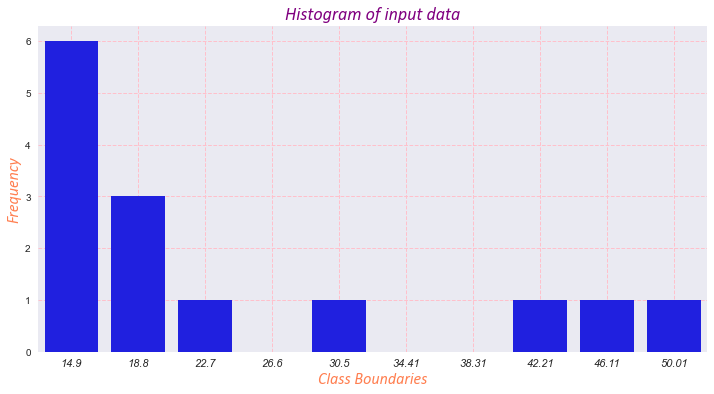

,Class_Distribution,Frequency,Class_Boundaries,Relative_Freq,Prob_Density
0,"[11, 14.901]",6,[11.0 - 14.901],0.428571,0.109862
1,"[14.901, 18.802]",3,[14.901 - 18.802],0.214286,0.054931
2,"[18.802, 22.703]",1,[18.802 - 22.703],0.071429,0.018310
3,"[22.703, 26.604]",0,[22.703 - 26.604],0.000000,0.000000
4,"[26.604, 30.505]",1,[26.604 - 30.505],0.071429,0.018310
5,"[30.505, 34.406]",0,[30.505 - 34.406],0.000000,0.000000
6,"[34.406, 38.307]",0,[34.406 - 38.307],0.000000,0.000000
7,"[38.307, 42.208]",1,[38.307 - 42.208],0.071429,0.018310
8,"[42.208, 46.108999999999995]",1,[42.208 - 46.108999999999995],0.071429,0.018310
9,"[46.108999999999995, 50.00999999999999]",1,[46.108999999999995 - 50.00999999999999],0.071429,0.018310


In [63]:
hist_data_results, bins_intervals, bins_prob_density = plot_hist(hist_data,number_of_bins=10)
hist_data_results

In [64]:
bins_intervals, bins_prob_density

(array([11.  , 14.9 , 18.8 , 22.7 , 26.6 , 30.5 , 34.41, 38.31, 42.21,
        46.11, 50.01]),
 array([0.10986194, 0.05493097, 0.01831032, 0.        , 0.01831032,
        0.        , 0.        , 0.01831032, 0.01831032, 0.01831032]))

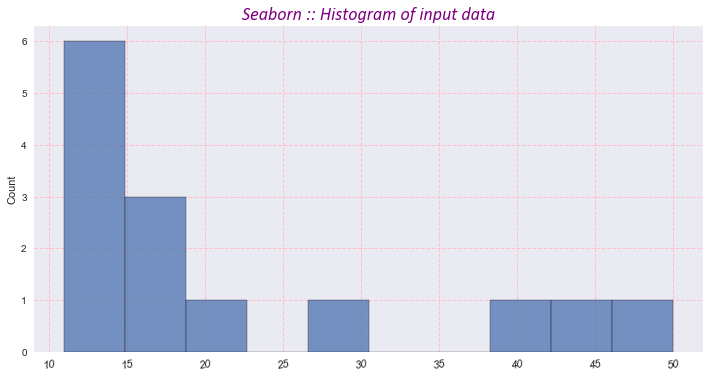

In [65]:
# Seaborn histogram
with plt.style.context('seaborn'):
    plt.figure(figsize=(12,6))
    sns.histplot(hist_data,bins=10)
    plt.title("Seaborn :: Histogram of input data",fontdict={'family':'calibri','size':18,'style':'oblique','color':'purple'})
    plt.xticks(size=11,style='oblique',rotation=10)
    plt.grid(which='major',color='pink',linestyle='--')
    plt.show() 

### **Relative_Frequency,Probability_Density_and_Cumulative_Frequency**
#### **Compare the Self implementated and Matplotlib/Seaborn Relative Frequency, Probability Density and Cumulative Frequencies** 

In [66]:
hist_data

[11, 11, 12, 13, 14, 11, 16, 17, 18, 20, 30, 40, 45, 50]

In [67]:
hist_data_results

,Class_Distribution,Frequency,Class_Boundaries,Relative_Freq,Prob_Density
0,"[11, 14.901]",6,[11.0 - 14.901],0.428571,0.109862
1,"[14.901, 18.802]",3,[14.901 - 18.802],0.214286,0.054931
2,"[18.802, 22.703]",1,[18.802 - 22.703],0.071429,0.018310
3,"[22.703, 26.604]",0,[22.703 - 26.604],0.000000,0.000000
4,"[26.604, 30.505]",1,[26.604 - 30.505],0.071429,0.018310
5,"[30.505, 34.406]",0,[30.505 - 34.406],0.000000,0.000000
6,"[34.406, 38.307]",0,[34.406 - 38.307],0.000000,0.000000
7,"[38.307, 42.208]",1,[38.307 - 42.208],0.071429,0.018310
8,"[42.208, 46.108999999999995]",1,[42.208 - 46.108999999999995],0.071429,0.018310
9,"[46.108999999999995, 50.00999999999999]",1,[46.108999999999995 - 50.00999999999999],0.071429,0.018310


In [68]:
## Mean & Std-dev of relative frequencies
sigma_rel_freq = np.std(hist_data_results['Relative_Freq'],ddof=1)
mean_rel_freq = np.mean(hist_data_results['Relative_Freq'])

sigma_rel_freq, mean_rel_freq

(0.13127665478181164, 0.09999999999999998)

In [69]:
## Relative frequencies sum-up to 1
print(np.sum(hist_data_results['Relative_Freq']))

## Area under the histogram integrates to 1
print(np.sum(hist_data_results['Prob_Density'] * 5))

0.9999999999999998
1.281722635221738


#### **How np.diff works?**

In [70]:
"""
Calculate the n-th discrete difference along the given axis.

The first difference is given by ``out[i] = a[i+1] - a[i]`` along the given axis, higher differences are calculated by using `diff`
recursively.
"""
hist_diff = np.diff(hist_data,axis=-1)
hist_data, hist_diff

([11, 11, 12, 13, 14, 11, 16, 17, 18, 20, 30, 40, 45, 50],
 array([ 0,  1,  1,  1, -3,  5,  1,  1,  2, 10, 10,  5,  5]))

#### **How Matplotlib generates probability density?**

In [71]:
"""
****** Matplotlib histogram and density ******
If density == ``True``, it draw and return a probability density: each bin will display the bin's raw count divided by the total number of
counts * the bin width
    (``density = counts / (sum(counts) * np.diff(bins))``),

so that the area under the histogram integrates to 1    
    (``np.sum(density * np.diff(bins)) == 1``).
"""
mat_plt_lib_prob_den=plt.hist(hist_data,density=True)
plt.close()

In [72]:
## Matplotlib generated probability density and class limits
print("Number of objects returned by Matplotlib:", len(mat_plt_lib_prob_den),'\n')

print("Probability Density: {}{}".format(np.round(mat_plt_lib_prob_den[0],4),'\n'))
print("Class Limits from data: {}{}".format(mat_plt_lib_prob_den[1],'\n'))

Number of objects returned by Matplotlib: 3 

Probability Density: [0.1099 0.0549 0.0183 0.     0.0183 0.     0.     0.0183 0.0183 0.0183]

Class Limits from data: [11.  14.9 18.8 22.7 26.6 30.5 34.4 38.3 42.2 46.1 50. ]



In [73]:
## Difference in class limits
mat_plt_lib_clas_lims_diff = np.diff(mat_plt_lib_prob_den[1])
mat_plt_lib_clas_lims_diff

array([3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9, 3.9])

In [74]:
## Probability density
mat_prob_den_manually = np.round([6/(14*3.9), 3/(14*3.9), 1/(14*3.9), 0/(14*3.9), 1/(14*3.9), 0/(14*3.9), 1/(14*3.9), 
                                  1/(14*3.9), 1/(14*3.9)],4)
mat_prob_den_manually

array([0.1099, 0.0549, 0.0183, 0.    , 0.0183, 0.    , 0.0183, 0.0183,
       0.0183])

In [75]:
## Area under the histogram integrates to 1
mat_plt_lib_auc = np.sum(mat_plt_lib_prob_den[0] * np.diff(mat_plt_lib_prob_den[1]))
mat_plt_lib_auc

0.9999999999999998

In [76]:
## Matplotlib Cumulative Probability Densities
mat_plt_lib_cum_prob_densities = np.cumsum(mat_plt_lib_prob_den[0] * np.diff(mat_plt_lib_prob_den[1]))
mat_plt_lib_cum_prob_densities

array([0.42857143, 0.64285714, 0.71428571, 0.71428571, 0.78571429,
       0.78571429, 0.78571429, 0.85714286, 0.92857143, 1.        ])

In [77]:
## Self calculated cumulative relative frequencies
hist_data_results['Cum_Rel_Freq'] = np.cumsum(hist_data_results['Relative_Freq'])
hist_data_results['Cum_Rel_Freq']

0    0.428571
1    0.642857
2    0.714286
3    0.714286
4    0.785714
5    0.785714
6    0.785714
7    0.857143
8    0.928571
9    1.000000
Name: Cum_Rel_Freq, dtype: float64

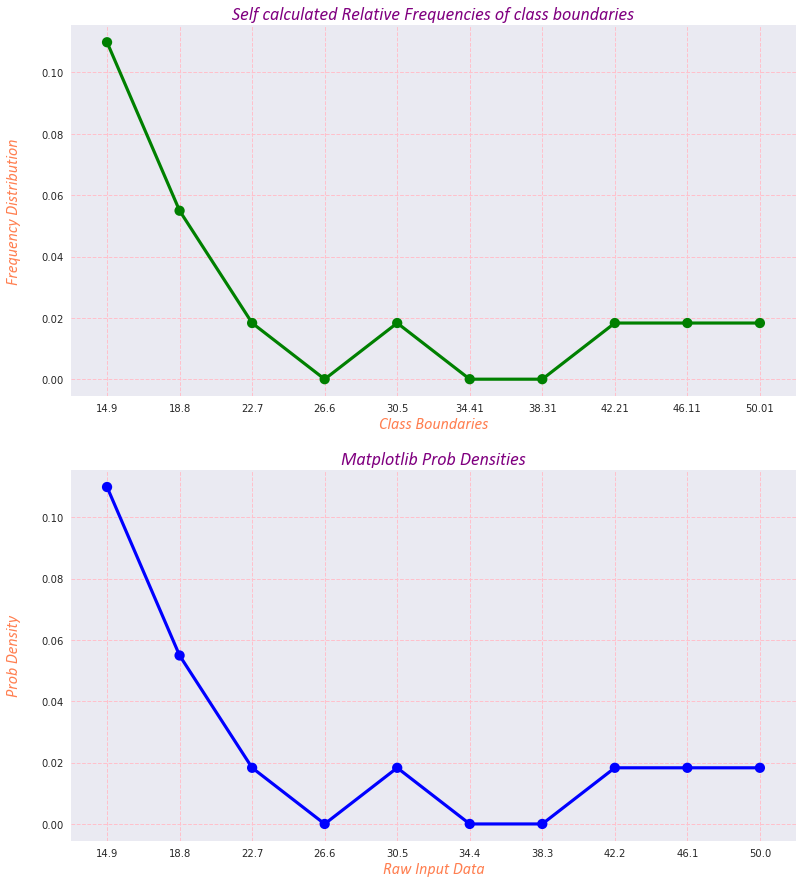

In [78]:
## Comparison b/w Self calculated Relative Frequencies & Matplotlib generated Probability Density
with plt.style.context('seaborn'):
    fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(13,15))
    sns.pointplot(x=bins_intervals[1:],y=bins_prob_density,label='Relative Freq',color='green',ax=ax[0])
    ax[0].grid(which='major',linestyle='--',color='pink')
    ax[0].set_title("Self calculated Relative Frequencies of class boundaries",
                    fontdict={'family':'calibri','size':18,'style':'oblique','color':'purple'})
    ax[0].set_xlabel("Class Boundaries",fontdict={'family':'calibri','size':16,'style':'oblique','color':'coral'})
    ax[0].set_ylabel("Frequency Distribution\n",fontdict={'family':'calibri','size':16,'style':'oblique','color':'coral'})
    
    sns.pointplot(x=mat_plt_lib_prob_den[1][1:],y=mat_plt_lib_prob_den[0],
                  label='Matplotlib Prob Density',color='blue',ax=ax[1])
    ax[1].grid(which='major',linestyle='--',color='pink')
    ax[1].set_title("Matplotlib Prob Densities",fontdict={'family':'calibri','size':18,'style':'oblique','color':'purple'})
    ax[1].set_xlabel("Raw Input Data",fontdict={'family':'calibri','size':16,'style':'oblique','color':'coral'})
    ax[1].set_ylabel("Prob Density\n",fontdict={'family':'calibri','size':16,'style':'oblique','color':'coral'})

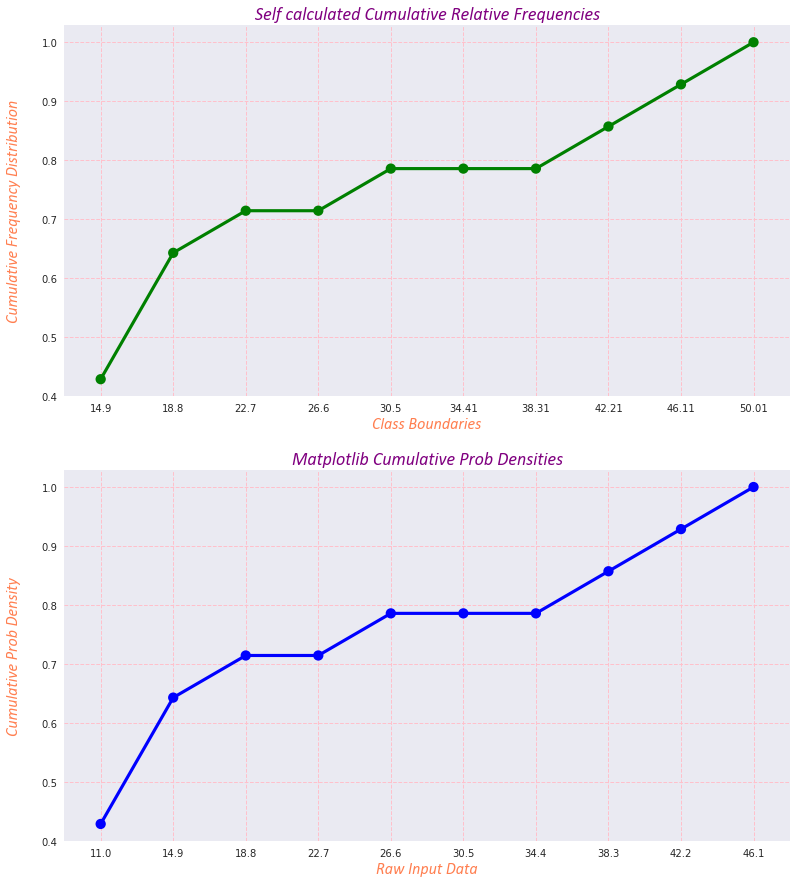

In [79]:
## Comparison b/w Self calculated Cumulative Relative Frequencies & Matplotlib generated Cumulative Probability Density
with plt.style.context('seaborn'):
    fig,ax = plt.subplots(nrows=2,ncols=1,figsize=(13,15))
    sns.pointplot(x=bins_intervals[1:],y=hist_data_results['Cum_Rel_Freq'],
                  label='Cumulative Relative Freq',color='green',ax=ax[0])    
    ax[0].grid(which='major',linestyle='--',color='pink')
    ax[0].set_title("Self calculated Cumulative Relative Frequencies",
                    fontdict={'family':'calibri','size':18,'style':'oblique','color':'purple'})
    ax[0].set_xlabel("Class Boundaries",fontdict={'family':'calibri','size':16,'style':'oblique','color':'coral'})
    ax[0].set_ylabel("Cumulative Frequency Distribution\n",fontdict={'family':'calibri','size':16,'style':'oblique','color':'coral'})
    
    sns.pointplot(y=mat_plt_lib_cum_prob_densities,x=mat_plt_lib_prob_den[1][0:-1],
                  label='Matplotlib Cumulative Prob Density',color='blue',ax=ax[1])
    ax[1].grid(which='major',linestyle='--',color='pink')
    ax[1].set_title("Matplotlib Cumulative Prob Densities",fontdict={'family':'calibri','size':18,'style':'oblique','color':'purple'})
    ax[1].set_xlabel("Raw Input Data",fontdict={'family':'calibri','size':16,'style':'oblique','color':'coral'})
    ax[1].set_ylabel("Cumulative Prob Density\n",fontdict={'family':'calibri','size':16,'style':'oblique','color':'coral'})

#### **Bingo!! Above graphs totally matched with the Matplotlib!!**

### **Kernel_Density_Estimator**

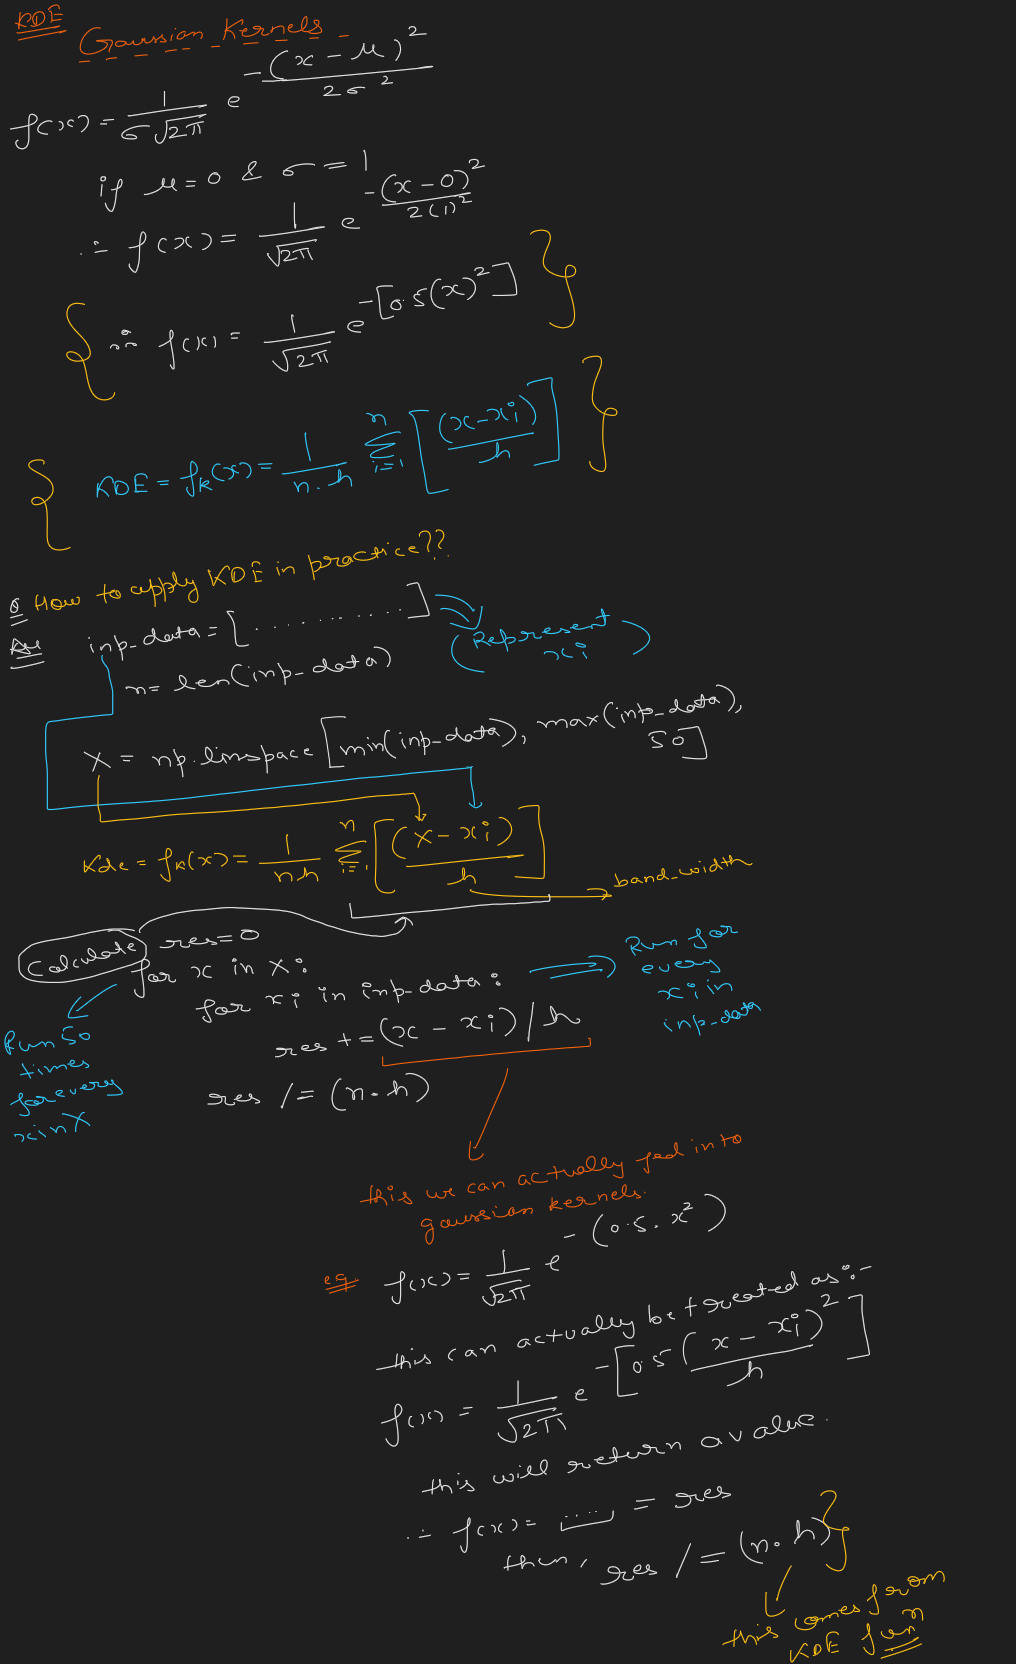

In [101]:
Image("KDE.png",width=1200,height=1200)

In [80]:
hist_data_results

,Class_Distribution,Frequency,Class_Boundaries,Relative_Freq,Prob_Density,Cum_Rel_Freq
0,"[11, 14.901]",6,[11.0 - 14.901],0.428571,0.109862,0.428571
1,"[14.901, 18.802]",3,[14.901 - 18.802],0.214286,0.054931,0.642857
2,"[18.802, 22.703]",1,[18.802 - 22.703],0.071429,0.018310,0.714286
3,"[22.703, 26.604]",0,[22.703 - 26.604],0.000000,0.000000,0.714286
4,"[26.604, 30.505]",1,[26.604 - 30.505],0.071429,0.018310,0.785714
5,"[30.505, 34.406]",0,[30.505 - 34.406],0.000000,0.000000,0.785714
6,"[34.406, 38.307]",0,[34.406 - 38.307],0.000000,0.000000,0.785714
7,"[38.307, 42.208]",1,[38.307 - 42.208],0.071429,0.018310,0.857143
8,"[42.208, 46.108999999999995]",1,[42.208 - 46.108999999999995],0.071429,0.018310,0.928571
9,"[46.108999999999995, 50.00999999999999]",1,[46.108999999999995 - 50.00999999999999],0.071429,0.018310,1.000000


In [81]:
def gauss_kernels(x):
    """
    Description: This function is created for generating the gaussian kernels.
    Input: It accepts one parameter:
        1. data: Value for which gaussian kernels to be generated
    Return: Gaussian Kernel
    """
    left_half = 1/math.sqrt(2*math.pi)
    second_half = np.exp((-0.5)*(x**2))
    gauss = left_half * second_half
    return gauss

def prob_distn_func(x_linspaced,inp_data,h=1):
    """
    Description: This function is created for performing the kernel density estimation.
    Input: It accepts 3 input parameters:
        1. x_linspaced: int/float
            It represents x in the KDE formula
        2. inp_data: np.array
            It represents x_i in the KDE formula
        3. h: int/float
            It represents bandwidth of gaussian kernels
    """
    ## Total elements in the data
    n = len(inp_data)
    if len(inp_data) == 0:
        return 0
    
    ## Performing KDE estimation
    kde_value = 0
    for idx,x_i in enumerate(inp_data):
        kde_value += gauss_kernels(np.divide((x_linspaced - x_i),h))
    kde_value /= (n*h)
    return kde_value

def density_plot(inp_data,use_external_h=False,h=0.05,bins=10):
    """
    Description: This function is created for generating the KDE plot.
    Input: It accepts 5 input parameters:
        1. inp_data: np.array
            Data for which density plot to be generated and it represents x_i in the KDE formula.
        2. use_external_h: boolean
            Flag for User-defined bandwidth of gaussian kernels
        3. h: int/float
            It represents bandwidth of gaussian kernels
        4. bins: integer
            Bins for plotting the histogram
    """
    if use_external_h:
        bandwidth=h
    else:
        ## Calculating the bandwidth = C * (n)^(-1/5)
        ##### Here, C = 1.05 * stddev(data) and n = len(data)
        bandwidth= 1.05 * np.std(inp_data) * (len(inp_data)**(-1/5))
    
    ## Generating linearly spaced x's
    x_linspace=np.linspace(min(inp_data),max(inp_data),50)
    
    ## Applying the Density Estimator
    y_prob_densities=[prob_distn_func(x_linspace[i],inp_data,bandwidth) for i in range(x_linspace.shape[0])]
    
    ## Plotting the Histogram and Density Estimation      
    with plt.style.context('seaborn'):
        plt.figure(figsize=(8,6))
        plt.hist(inp_data,bins=bins,density=True,color='lightblue',label='Histogram')
        plt.plot(x_linspace.tolist(),y_prob_densities,color='black',linestyle='-',label='KDE')
        plt.grid(which='major',linestyle='--',color='pink')
        plt.xlabel("Data Values",fontdict={'family':'calibri','size':17,'style':'oblique','color':'coral'})
        plt.title("KDE Estimation plot",fontdict={'family':'calibri','size':18,'style':'oblique','color':'purple'})
        plt.legend()

### **PMF:Discrete_Variable**

In [82]:
data_dv=[2,3,4,5,6]

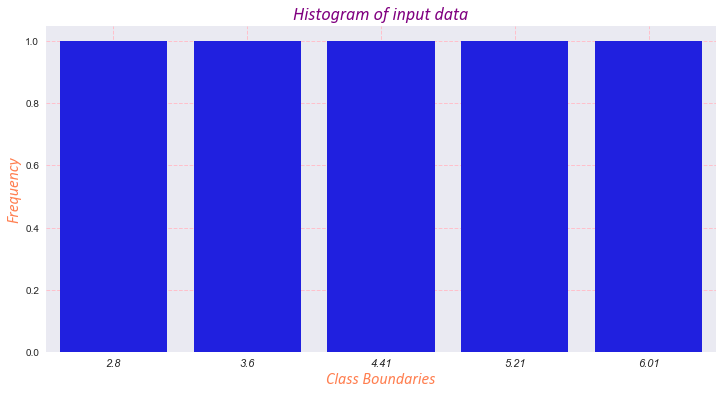

In [83]:
a_dv,b_dv,p_dv = plot_hist(data=data_dv,number_of_bins=5)

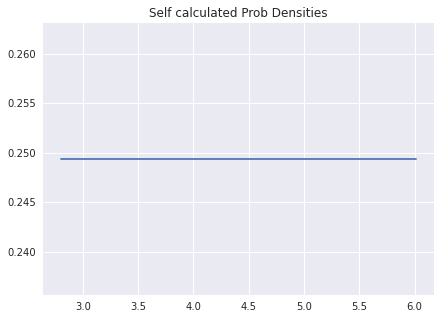

In [84]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(7,5))
    plt.plot(b_dv[1:],p_dv)
    plt.title("Self calculated Prob Densities");

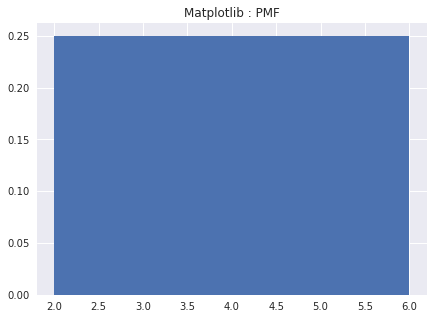

In [85]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(7,5))
    plt.hist(data_dv,bins=5,density=True)
    plt.title("Matplotlib : PMF");

#### **As we know in PMF we have equi-probable values.**

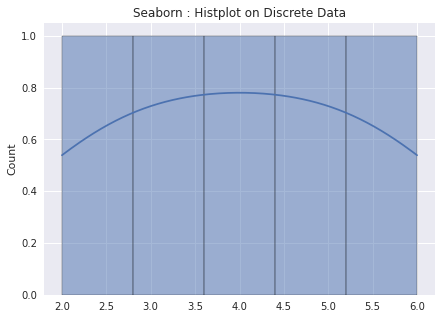

In [86]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(7,5))
    sns.histplot(data_dv,bins=5,kde=True)
    plt.title("Seaborn : Histplot on Discrete Data");

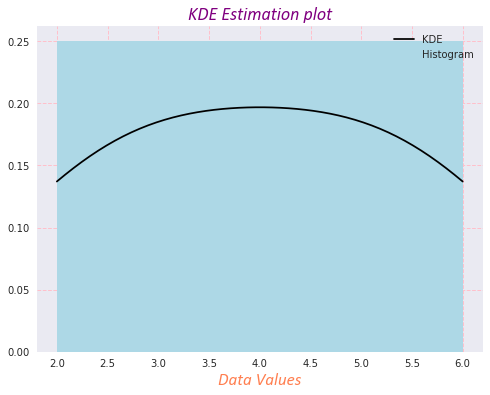

In [87]:
density_plot(data_dv,bins=5)

### **PDF:Continuous_Random_Variable(Gaussian)**

In [88]:
data_cv = np.random.normal(size=10000)*2.1

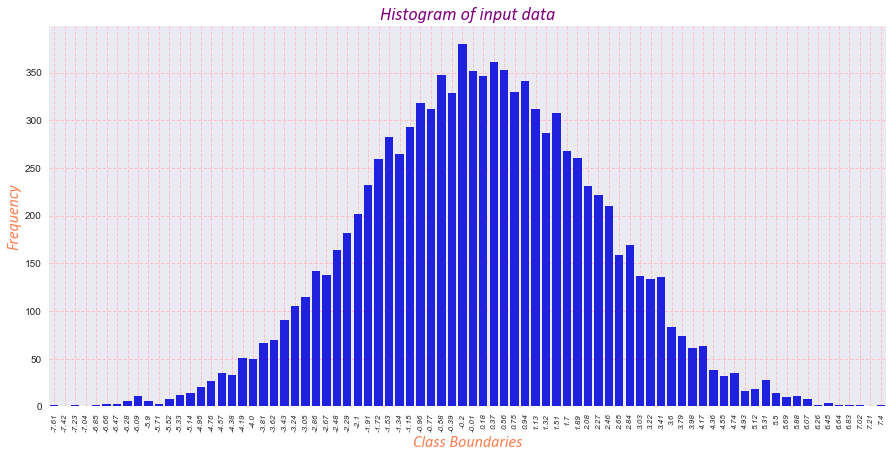

In [89]:
a_cv,b_cv,p_cv = plot_hist(data=data_cv,number_of_bins=80)

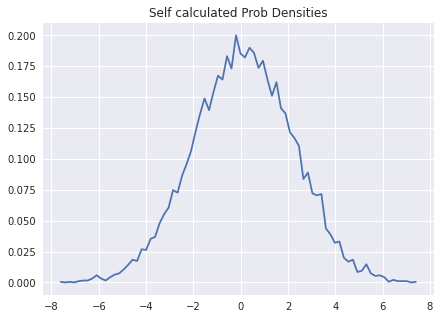

In [90]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(7,5))
    plt.plot(b_cv[1:],p_cv)
    plt.title("Self calculated Prob Densities");

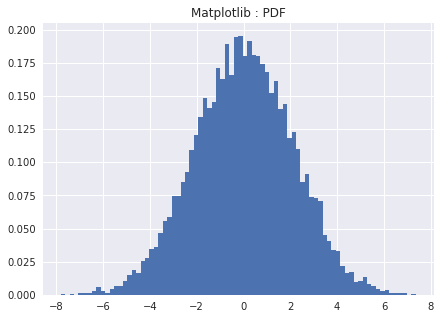

In [91]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(7,5))
    plt.hist(data_cv,bins=80,density=True)
    plt.title("Matplotlib : PDF");

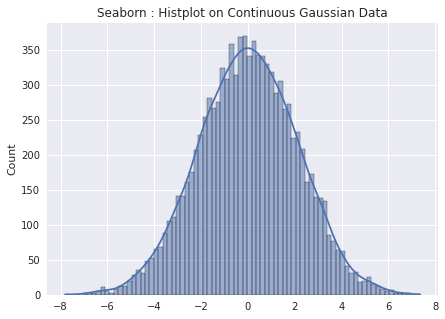

In [92]:
with plt.style.context('seaborn'):
    plt.figure(figsize=(7,5))
    sns.histplot(data_cv,bins=80,kde=True)
    plt.title("Seaborn : Histplot on Continuous Gaussian Data");

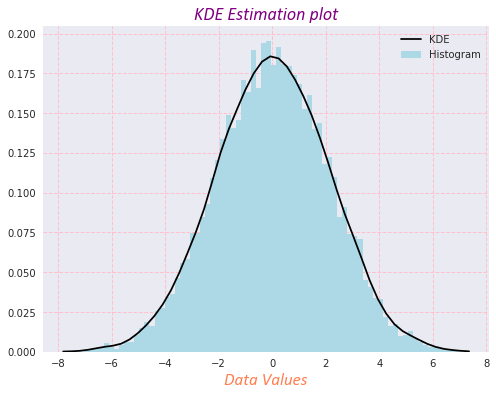

In [93]:
density_plot(data_cv,bins=80)

#### Above shows the normal bell-shaped curve.

##### **KDE on Small Random Dataset**

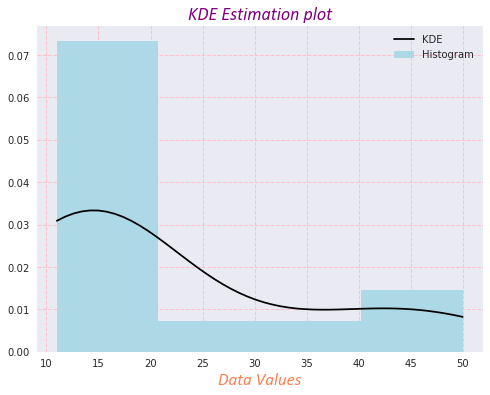

In [94]:
density_plot(hist_data,use_external_h=False,h=5,bins=4)

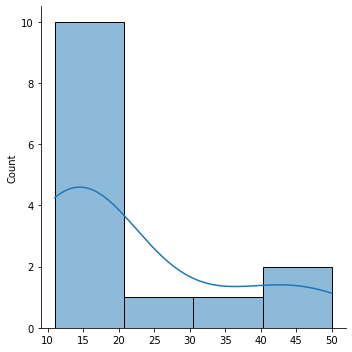

In [95]:
sns.displot(hist_data,kde=True,bins=4)

### **Effect_of_H_in_KDE**
#### **Effect of lower or higher value of bandwidth on KDE?**

##### **Smaller Value**

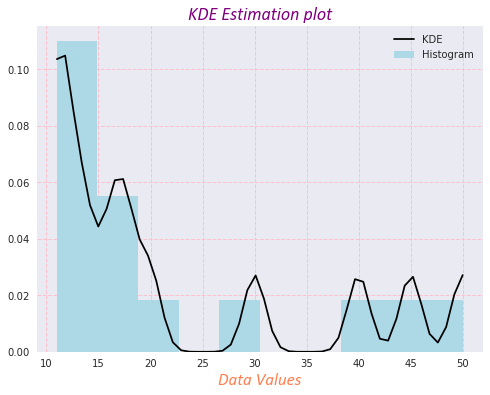

In [96]:
density_plot(hist_data,use_external_h=True,h=1.05)

#### Smaller value of h gives squiggly plot.

##### **Higher Value**

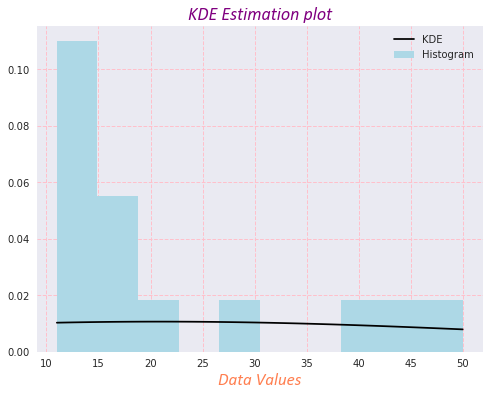

In [97]:
density_plot(hist_data,use_external_h=True,h=35)

#### Larger value of h gives flat plot.

#### **Reference Links**

- **Probability Density** & **Relative Frequencies**
    - https://stackoverflow.com/questions/41974615/how-do-i-calculate-pdf-probability-density-function-in-python
    - https://www.quora.com/What-is-the-distinction-between-a-probability-distribution-and-a-relative-frequency-distribution


- **KDE implementation**
    - https://medium.com/analytics-vidhya/kernel-density-estimation-kernel-construction-and-bandwidth-optimization-using-maximum-b1dfce127073
    - https://www.programmersought.com/article/52286021603/